In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy import signal
import math
import itertools
import random
import time
from Crypto.Util import number  # PyCryptodome

import matplotlib.pyplot as plt
from matplotlib import collections as matcoll

## Density function of a gaussian

### parameters

In [39]:
np.random.seed(42)

# length of secret s
n = 1024

# modulus 
#p = 2  # only prime numbers (it has to be a finite field)
#p = number.getPrime(n.bit_length(), randfunc=np.random.bytes)  
p = number.getPrime(n.bit_length()**2, randfunc=np.random.bytes)  # using pycrypto lib  (p = O(n^2))
p = 12289
print("Prime:", p)

# distribution 
## gaussian in this example according to the paper https://cims.nyu.edu/~regev/papers/lwesurvey.pdf (09.11.2021, page 2)
mu = 0
alpha = 1/(math.sqrt(n)*(math.log2(n)**2))   # α = 1/(√n log^2(n))
alpha = 0.00023
print("Alpha:", alpha)
sigma = alpha * p   
print("Mu:", mu, "\t Sigma:", sigma)

Prime: 12289
Alpha: 0.00023
Mu: 0 	 Sigma: 2.82647


### visualize density

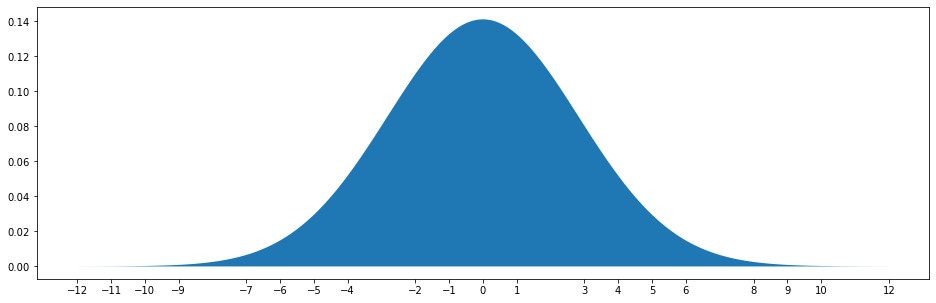

In [40]:
gridPointCount = 10000; delta = 1/gridPointCount
interval = [-4*np.ceil(sigma), 4*np.ceil(sigma)]

x = np.linspace(interval[0], interval[1], gridPointCount)
y = scipy.stats.norm.pdf(x, loc=mu, scale=sigma)

fig, ax = plt.subplots(figsize=(16, 5))
ax.fill_between(x, y)
ax.set_xticks(np.linspace(interval[0], interval[1], 20, dtype = int))
fig.savefig('gaussianPropapation.png')
plt.show()

## visualize actual distribution function

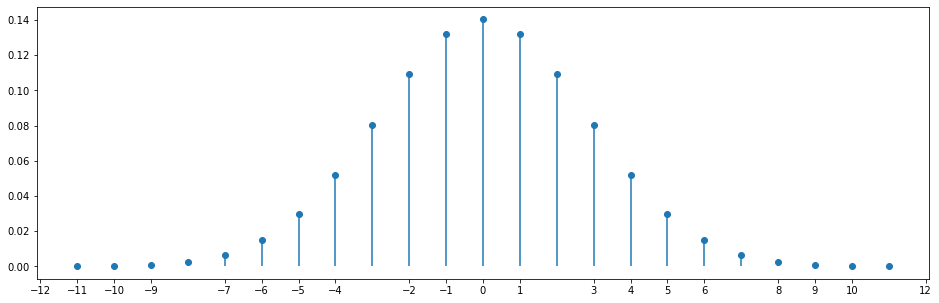

In [41]:
x = np.arange(interval[0]+.5, interval[1]+.5, 1)
y = scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

z = y[1:] - y[:-1] 

fig, ax = plt.subplots(figsize=(16, 5))
ax.stem(x[:-1]+.5, z, basefmt=" ", use_line_collection=True)
ax.set_xticks(np.linspace(interval[0], interval[1], 20, dtype = int))
fig.savefig('roundedGaussianPropapation.png')
plt.show()

## convolve distributions

We calculate linear combinations. So we investigate the convolution of gaussians $(Y = X + \dots + X)$ with $X\sim\mathcal{N}(\mu,\,\sigma^{2})$

In [31]:
# count of Convolutions
print("Maximal Count:", n)
convolutionsCount = 512
print("Actual Count:", n)

Maximal Count: 512
Actual Count: 512


Sum of normal pmf: 0.9999781969774892
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
26

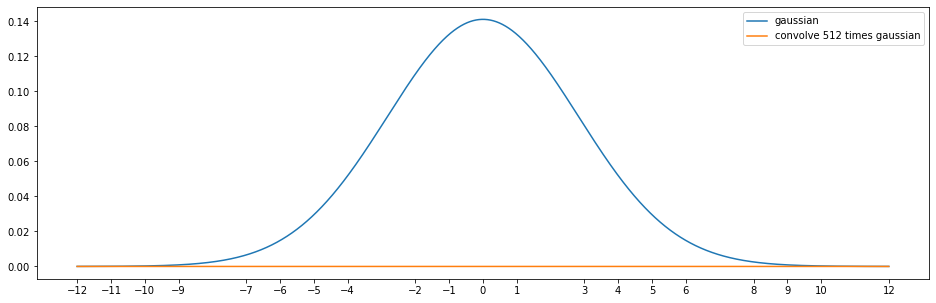

In [32]:
x = np.arange(interval[0], interval[1],delta)

gaussian = scipy.stats.norm.pdf(x, loc=mu, scale=sigma)
print("Sum of normal pmf: "+str(sum(gaussian*delta)))

conv_pdf = signal.convolve(gaussian,gaussian,'same')*delta
for i in range(1, convolutionsCount):
    print(i)
    conv_pdf = signal.fftconvolve(conv_pdf,gaussian,'same')*delta
print("Sum of convoluted pmf: "+str(sum(conv_pdf*delta)))

#print("Integration of convoluted pdf: " + str(np.trapz(conv_pdf, x)))

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(x,gaussian, label='gaussian')
ax.plot(x,conv_pdf, label='convolve %s times gaussian' % (convolutionsCount))
ax.set_xticks(np.linspace(interval[0], interval[1], 20, dtype = int))
ax.legend(loc='best')
fig.savefig('convolvedGaussianPropapation.png')
fig.show()

scalar multiplication gaussian

${\displaystyle \sum _{i=1}^{n}c_{i}X_{i}\sim {\mathcal {N}}\left(\sum _{i=1}^{n}c_{i}\mu _{i},\sum _{i=1}^{n}c_{i}^{2}\sigma _{i}^{2}\right)}$

Sum of normal pmf: 0.8457569286443102
Sum of normal pmf: 0.9999441444275291
Sum of normal pmf: 0.9956199053183016
Sum of normal pmf: 0.9800097197525123
Sum of normal pmf: 0.9560779867885734
Sum of normal pmf: 0.9284738794810996
Sum of normal pmf: 0.9000519067003023
Sum of normal pmf: 0.8722592001437199


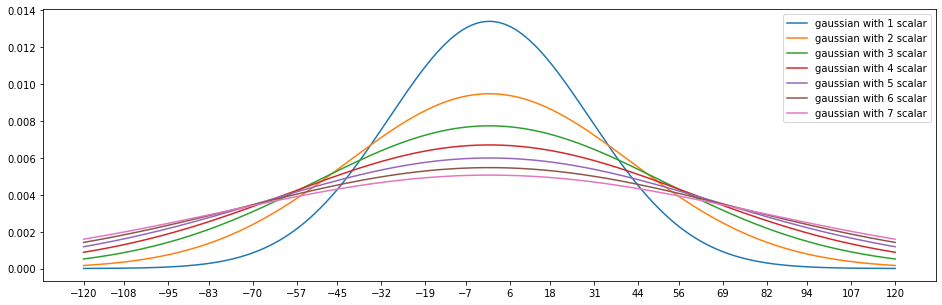

In [10]:
scalar = 8

x = np.arange(interval[0], interval[1],delta)


gaussianScaled = scipy.stats.norm.pdf(x, loc=mu, scale=np.sqrt(scalar)*sigma)
print("Sum of normal pmf: "+str(sum(gaussianScaled*delta)))

fig, ax = plt.subplots(figsize=(16, 5))
for i in range(1, scalar):
    gaussian = scipy.stats.norm.pdf(x, loc=mu, scale=np.sqrt(i)*sigma)
    print("Sum of normal pmf: "+str(sum(gaussian*delta)))
    ax.plot(x,gaussian, label='gaussian with %d scalar'%i)
ax.set_xticks(np.linspace(interval[0], interval[1], 20, dtype = int))
ax.legend(loc='best')
fig.savefig('scaledGaussianPropapation.png')
fig.show()

## Example for a realization of gaussian and convolved gaussians

### gaussian

In [42]:
# size parameter
m = 40000000
scalar = 5

np.random.seed(42)
e = np.rint(np.random.normal(loc=mu, scale=np.sqrt(scalar)*sigma, size=m))  # rounding specified by the IEEE floating point standard IEEE 754 

Error -0.0 has most counts


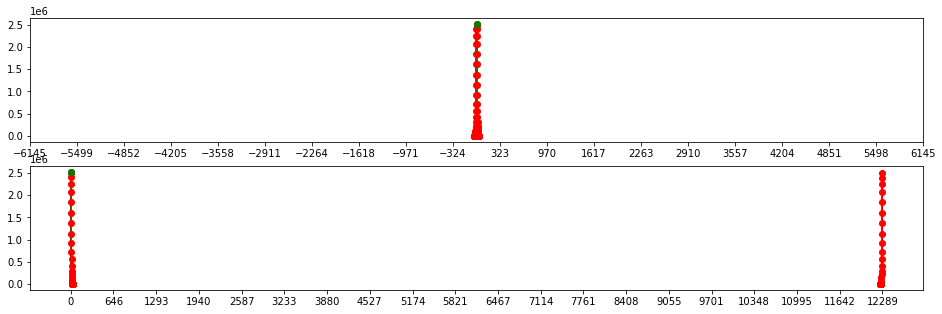

In [43]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 5))

unique, counts = np.unique(e, return_counts=True)
ax[0].stem(unique, counts, 'r', markerfmt='ro', basefmt=" ", use_line_collection=True)
ax[0].stem(0, counts[unique == 0], 'g', markerfmt='go', basefmt=" ", use_line_collection=True)
ax[0].set_xticks(np.linspace(-np.ceil(p/2), np.ceil(p/2), 20, dtype = int))
print("Error", unique[np.argmax(counts)], "has most counts")

unique, counts = np.unique(e%p, return_counts=True)
ax[1].stem(unique, counts, 'r', markerfmt='ro', basefmt=" ", use_line_collection=True)
ax[1].stem(0, counts[unique == 0], 'g', markerfmt='go', basefmt=" ", use_line_collection=True)
ax[1].set_xticks(np.linspace(0, np.ceil(p), 20, dtype = int))

fig.savefig('simulPropapation.png')
plt.show()

## convolved gaussians

In [46]:
np.random.seed(42)
convolutionsCount = 1024
scalar = 1

e = np.rint(np.random.normal(loc=mu, scale=np.sqrt(scalar)*sigma, size=m))  # rounding specified by the IEEE floating point standard IEEE 754 

# convolve
e *= convolutionsCount

Error 0.0 has most counts


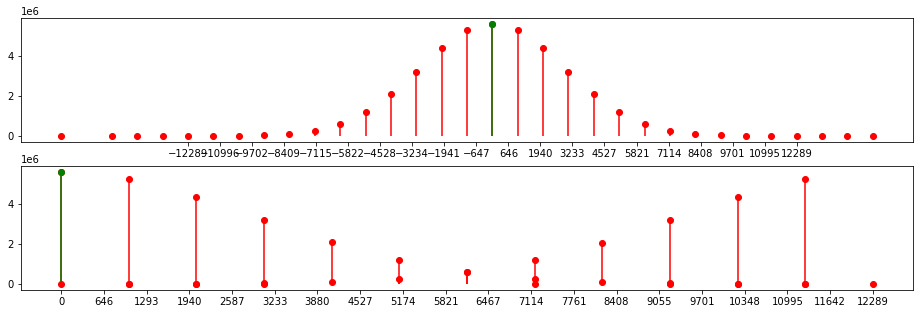

In [47]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 5))

unique, counts = np.unique(e, return_counts=True)
ax[0].stem(unique, counts, 'r', markerfmt='ro', basefmt=" ", use_line_collection=True)
ax[0].stem(0, counts[unique == 0], 'g', markerfmt='go', basefmt=" ", use_line_collection=True)
ax[0].set_xticks(np.linspace(-np.ceil(p), np.ceil(p), 20, dtype = int))
print("Error", unique[np.argmax(counts)], "has most counts")

unique, counts = np.unique(e%p, return_counts=True)
ax[1].stem(unique, counts, 'r', markerfmt='ro', basefmt=" ", use_line_collection=True)
ax[1].stem(0, counts[unique == 0], 'g', markerfmt='go', basefmt=" ", use_line_collection=True)
ax[1].set_xticks(np.linspace(0, np.ceil(p), 20, dtype = int))

fig.savefig('simulPropapationMain.png')

plt.show()